# <font color = orange> Top 1000 instagrammers – world 
## This dataset comprises of the details of top 1000 influencers in instagram

### Data Dictionary

Name: Name of the account  
Rank: Overall rank in the world  
Category: Stream of the account (Music, Games, etc..)  
Followers: Number of followers  
Audience Country: country of the majority of audience  
Authentic Engagement: Engagement with the users  
Engagement Avg.: Average engagement of the users

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

inst = pd.read_csv('/Users/olesya/Desktop/top_1000_instagrammers.csv', sep = ',')
inst

,Name,Rank,Category,Followers,Audience Country,Authentic Engagement,Engagement Avg.
0,cristiano,1,Sports with a ball,462.9M,India,5.5M,6.6M
1,leomessi,2,Sports with a ballFamily,347.2M,Argentina,3.6M,4.8M
2,kendalljenner,3,ModelingFashion,247.6M,United States,3M,4.9M
3,arianagrande,4,Music,321.4M,United States,2.4M,3.4M
4,zendaya,5,Cinema & Actors/actressesFashion,147M,United States,4.3M,5.8M
...,...,...,...,...,...,...,...
995,nimratkhairaofficial,996,Music,8M,India,211.1K,261.8K
996,hanhyojoo222,997,TravelCinema & Actors/actresses,4M,Indonesia,434.2K,518.2K
997,memphisdepay,998,Sports with a ball,15M,France,76.4K,135.5K
998,arminzareeiofficial,999,NaN,9.8M,Iran,135.4K,214K


### 0. Подготовка датасета
#### Работа с типами данных, пропущенными данными, заголовками и др.

In [2]:
inst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Name                  1000 non-null   object
 1   Rank                  1000 non-null   int64 
 2   Category              916 non-null    object
 3   Followers             1000 non-null   object
 4   Audience Country      986 non-null    object
 5   Authentic Engagement  1000 non-null   object
 6   Engagement Avg.       1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


<font color = blue> Прежде всего, обратим внимание на то, что ячейкам под заголовками "Followers", "Authentic Engagement" и " Engagement Avg." присвоен тип object, хотя по смыслу это числовые данные – значит необходимо перекодировать эти колонки в тип int.   
Задача усложняется тем, что в значениях присутствуют буквы M и K, которые обозначают порядок миллионов и тысяч.  
Создадим функцию, чтобы избавиться от данных букв в ячейках и затем изменить тип данных на необходимый.

In [3]:
def parse_quantity(data):
    postfix = data[-1:]
    units = {'M': 10**6, 'K': 10**3,}
    if postfix.isalpha():
        unit = units[postfix]
        data = float(data[:-1])
    else:
        unit = 1
        data = float(data)
    return int(data * unit)

In [4]:
inst['Followers'] = inst['Followers'].apply(parse_quantity)
inst['Authentic Engagement'] = inst['Authentic Engagement'].apply(parse_quantity)
inst['Engagement Avg.'] = inst['Engagement Avg.'].apply(parse_quantity)

<font color = blue> Далее убедимся в том, что функция сработала, и мы действительно получили необходимые значения типа int.

In [5]:
inst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Name                  1000 non-null   object
 1   Rank                  1000 non-null   int64 
 2   Category              916 non-null    object
 3   Followers             1000 non-null   int64 
 4   Audience Country      986 non-null    object
 5   Authentic Engagement  1000 non-null   int64 
 6   Engagement Avg.       1000 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 54.8+ KB


In [6]:
inst.head()

,Name,Rank,Category,Followers,Audience Country,Authentic Engagement,Engagement Avg.
0,cristiano,1,Sports with a ball,462900000,India,5500000,6600000
1,leomessi,2,Sports with a ballFamily,347200000,Argentina,3600000,4800000
2,kendalljenner,3,ModelingFashion,247600000,United States,3000000,4900000
3,arianagrande,4,Music,321400000,United States,2400000,3400000
4,zendaya,5,Cinema & Actors/actressesFashion,147000000,United States,4300000,5800000


<font color = blue> Перейдем к работе над колонками "Category" и "Audience Country", которым также изначально присвоен тип данных object. Колонка "Category" описывает тематические категории, к которым отнесен тот или иной блогер из списка, а в колонке "Audience Country" мы имеем конечный и фиксированный список стран. Соответственно, более подходящим типом для этих данных будет являться тип category. Переведем данные в необходимый формат.

In [7]:
inst['Category'] = pd.Categorical(inst['Category'])
inst['Audience Country'] = pd.Categorical(inst['Audience Country'])

<font color = blue> И проверим, что теперь колонкам "Category" и "Audience Country" действительно присвоен тип category.

In [8]:
inst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Name                  1000 non-null   object  
 1   Rank                  1000 non-null   int64   
 2   Category              916 non-null    category
 3   Followers             1000 non-null   int64   
 4   Audience Country      986 non-null    category
 5   Authentic Engagement  1000 non-null   int64   
 6   Engagement Avg.       1000 non-null   int64   
dtypes: category(2), int64(4), object(1)
memory usage: 48.7+ KB


In [9]:
inst['Category'].cat.categories

Index(['Adult content', 'Animals', 'Art/Artists', 'Art/ArtistsBeauty',
       'Art/ArtistsCinema & Actors/actresses',
       'Art/ArtistsCinema & Actors/actressesMusic',
       'Art/ArtistsCinema & Actors/actressesShows',
       'Art/ArtistsFashionModeling', 'Art/ArtistsFashionMusic',
       'Art/ArtistsShows',
       ...
       'ShowsModeling', 'ShowsMusic', 'Sports with a ball',
       'Sports with a ballClothing & Outfits', 'Sports with a ballFamily',
       'Sports with a ballLifestyle', 'Sports with a ballLifestyleKids & Toys',
       'Sports with a ballLiterature & Journalism', 'Sports with a ballShows',
       'TravelCinema & Actors/actresses'],
      dtype='object', length=153)

<font color = blue> *Обратим внимание, что некоторые данные в колонке "Category" представлены не совсем в "чистом" виде, так как одному блогеру могут быть присвоены несколько категорий, которые в таком случае "слипаются" при перечислении. Будем иметь это в виду в будущем, учитывая при анализе данных из этой колонки.

In [10]:
inst['Audience Country'].cat.categories

Index(['Albania', 'Algeria', 'Argentina', 'Brazil', 'Chile', 'China',
       'Colombia', 'Egypt', 'France', 'Germany', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Italy', 'Japan', 'Kazakhstan', 'Mexico', 'Morocco', 'Nigeria',
       'Pakistan', 'Philippines', 'Poland', 'Russia', 'Senegal', 'South Korea',
       'Spain', 'Syria', 'Thailand', 'Turkey', 'United Arab Emirates',
       'United Kingdom', 'United States'],
      dtype='object')

<font color = blue> Отметим также, что согласно df.info в датасете присутствуют пропущенные значения. Так как мы имеем пропуски в колонках "Category" и "Audience Country" с категориальным типом данных, то заполнить числовыми данными по методу среднего или рандомного числа не получится. Посмотрим, сколько всего таких пропущенных значений.

In [11]:
inst.isna().sum()

Name                     0
Rank                     0
Category                84
Followers                0
Audience Country        14
Authentic Engagement     0
Engagement Avg.          0
dtype: int64

In [12]:
inst[inst['Category'].isna()]

,Name,Rank,Category,Followers,Audience Country,Authentic Engagement,Engagement Avg.
9,thv,10,NaN,46300000,United States,13300000,13300000
14,j.m,15,NaN,38100000,NaN,11800000,11800000
16,jin,17,NaN,37400000,United States,9900000,9900000
101,yawnzzn,102,NaN,9600000,India,3200000,4099999
102,chrisevans,103,NaN,17000000,United States,1900000,2300000
...,...,...,...,...,...,...,...
971,hank_says_hank,972,NaN,3200000,South Korea,566700,665100
979,allusnehareddy,980,NaN,8199999,India,220700,256100
981,ho5hi_kwon,982,NaN,3000000,Indonesia,547000,712100
986,jxxvvxxk,987,NaN,3400000,Indonesia,489800,614300


In [13]:
inst[inst['Audience Country'].isna()]

,Name,Rank,Category,Followers,Audience Country,Authentic Engagement,Engagement Avg.
14,j.m,15,NaN,38100000,NaN,11800000,11800000
15,agustd,16,Lifestyle,36500000,NaN,10400000,10400000
29,jungkook.97,30,Music,43000000,NaN,5200000,5200000
35,rkive,36,Lifestyle,36000000,NaN,5400000,5400000
204,marshmello,205,NaN,29400000,NaN,0,579200
216,marshmello,217,Music,29400000,NaN,0,547600
276,lomon991111,277,Lifestyle,5700000,NaN,0,2100000
544,pablogavi,545,NaN,4700000,NaN,0,1000000
595,joshu_acoustic,596,Music,4200000,NaN,0,1000000
674,sugaringcandy,675,NaN,2500000,NaN,0,1400000


<font color = blue> К сожалению, мы никак не сможем заполнить пропущенные значения по столбцам "Category" и "Audience Country". Мы могли бы удалить их, но так как пропущенные значения составляют относительно небольшой процент от общего числа значений (14 пропусков по "Audience Country" (1.4%) и 84 пропуска по "Category" (8.4%)) и распределены достаточно равномерно, то есть присутствуют и в верхних и в нижних рангах, мы примем решение оставить строки с пропущенными значениями и иметь их в виду как погрешность и ограничение данного анализа. Не будем удалять их, чтобы это не отразилось на расчетах описательных статистик при дальнейшем анализе датасета.

<font color = blue>  В качестве последнего этапа переименуем некоторые колонки, присвоив им более точные и понятные названия (для удобства и единообразия датасета оставим английский язык).

In [14]:
inst.rename(columns = {'Name':'Blogger Name', 'Rank': 'Rank №', 'Category':'Blog Topic', 
                       'Followers':'Number of Followers', 'Audience Country':'Audience Country', 
                       'Authentic Engagement':'Authentic Engagement','Engagement Avg.':'Avg User Engagement'},
            inplace = True)

In [15]:
inst

,Blogger Name,Rank №,Blog Topic,Number of Followers,Audience Country,Authentic Engagement,Avg User Engagement
0,cristiano,1,Sports with a ball,462900000,India,5500000,6600000
1,leomessi,2,Sports with a ballFamily,347200000,Argentina,3600000,4800000
2,kendalljenner,3,ModelingFashion,247600000,United States,3000000,4900000
3,arianagrande,4,Music,321400000,United States,2400000,3400000
4,zendaya,5,Cinema & Actors/actressesFashion,147000000,United States,4300000,5800000
...,...,...,...,...,...,...,...
995,nimratkhairaofficial,996,Music,8000000,India,211100,261800
996,hanhyojoo222,997,TravelCinema & Actors/actresses,4000000,Indonesia,434200,518200
997,memphisdepay,998,Sports with a ball,15000000,France,76400,135500
998,arminzareeiofficial,999,NaN,9800000,Iran,135400,214000


### 1. Создание новых переменных
#### Создадим некоторые новые переменные на основе уже имеющихся в датасете данных

<font color = blue> Например, создадим новую переменную, которую назовем "Engagement Rate" (коэффициент ER) – она будет показывать уровень вовлеченности подписчиков аккаунта не в числовом, а в процентном соотношении по отношению количеству подписчиков. Коэффициент ER можно рассчитать несколькими способами, однако на наших данных можно использовать формулу (среднее количество вовлеченных пользователей / количество подписчиков) * 100, то есть (Avg User Engagement / Number of Followers) * 100. Умножаем на 100, чтобы сразу получить данные в %.

In [16]:
inst['Engagement Rate'] = (inst['Avg User Engagement'] / inst['Number of Followers']) * 100

In [17]:
inst.head()

,Blogger Name,Rank №,Blog Topic,Number of Followers,Audience Country,Authentic Engagement,Avg User Engagement,Engagement Rate
0,cristiano,1,Sports with a ball,462900000,India,5500000,6600000,1.425794
1,leomessi,2,Sports with a ballFamily,347200000,Argentina,3600000,4800000,1.382488
2,kendalljenner,3,ModelingFashion,247600000,United States,3000000,4900000,1.978998
3,arianagrande,4,Music,321400000,United States,2400000,3400000,1.057872
4,zendaya,5,Cinema & Actors/actressesFashion,147000000,United States,4300000,5800000,3.945578


<font color = blue> Видим, что по умолчанию наши значения ER имеют 6 знаков после запятой. Такая точность нам не требуется, поэтому округлим до двух знаков после запятой и перезапишем данные в колонке.

In [18]:
inst['Engagement Rate'] = round(inst['Engagement Rate'], 2)

In [19]:
inst.head()

,Blogger Name,Rank №,Blog Topic,Number of Followers,Audience Country,Authentic Engagement,Avg User Engagement,Engagement Rate
0,cristiano,1,Sports with a ball,462900000,India,5500000,6600000,1.43
1,leomessi,2,Sports with a ballFamily,347200000,Argentina,3600000,4800000,1.38
2,kendalljenner,3,ModelingFashion,247600000,United States,3000000,4900000,1.98
3,arianagrande,4,Music,321400000,United States,2400000,3400000,1.06
4,zendaya,5,Cinema & Actors/actressesFashion,147000000,United States,4300000,5800000,3.95


In [20]:
inst['Engagement Rate'].describe()

count    1000.00000
mean        6.13492
std         8.27138
min         0.02000
25%         1.25000
50%         3.29500
75%         7.50250
max       118.75000
Name: Engagement Rate, dtype: float64

<font color = blue> На основании новой переменной "Engagement Rate" создадим еще одну переменную, на этот раз категориальную. В маркетинге коэффициент ER используют, чтобы оценить, насколько эффективны коммуникации через соцсети (то есть насколько активно пользователи взаимодействуют с контентом в соцсетях – ставят лайки, комментируют, репостят или сохраняют публикации). Мы разделим полученные значения ER по категориям – низкая, средняя, хорошая и высокая вовлеченность. Для определения границ возьмем средние общепринятые значения.

In [21]:
def get_engagement_cat(engagement):
    if engagement < 1:
        return 'Low'
    elif engagement < 3.5:
        return 'Medium'
    elif engagement <= 6:
        return 'Good'
    elif engagement > 6:
        return 'High'
    else:
        return engagement

<font color = blue> Проверим, что функция работает, а затем запишем ее в новую переменную и перекодируем эту переменную как категориальную.

In [22]:
inst['Engagement Rate'].apply(get_engagement_cat)

0      Medium
1      Medium
2      Medium
3      Medium
4        Good
        ...  
995    Medium
996      High
997       Low
998    Medium
999    Medium
Name: Engagement Rate, Length: 1000, dtype: object

In [23]:
inst['Engagement Rate Category'] = inst['Engagement Rate'].apply(get_engagement_cat)

In [24]:
inst.head()

,Blogger Name,Rank №,Blog Topic,Number of Followers,Audience Country,Authentic Engagement,Avg User Engagement,Engagement Rate,Engagement Rate Category
0,cristiano,1,Sports with a ball,462900000,India,5500000,6600000,1.43,Medium
1,leomessi,2,Sports with a ballFamily,347200000,Argentina,3600000,4800000,1.38,Medium
2,kendalljenner,3,ModelingFashion,247600000,United States,3000000,4900000,1.98,Medium
3,arianagrande,4,Music,321400000,United States,2400000,3400000,1.06,Medium
4,zendaya,5,Cinema & Actors/actressesFashion,147000000,United States,4300000,5800000,3.95,Good


In [25]:
inst['Engagement Rate Category'] = pd.Categorical(inst['Engagement Rate Category'])

<font color = blue> Проверим, что данные в колонке "Engagement Rate Cat" перезаписались и теперь им присвоен тип category.

In [26]:
inst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Blogger Name              1000 non-null   object  
 1   Rank №                    1000 non-null   int64   
 2   Blog Topic                916 non-null    category
 3   Number of Followers       1000 non-null   int64   
 4   Audience Country          986 non-null    category
 5   Authentic Engagement      1000 non-null   int64   
 6   Avg User Engagement       1000 non-null   int64   
 7   Engagement Rate           1000 non-null   float64 
 8   Engagement Rate Category  1000 non-null   category
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 57.7+ KB


In [27]:
inst['Engagement Rate Category'].cat.categories

Index(['Good', 'High', 'Low', 'Medium'], dtype='object')

In [28]:
inst['Blog Topic'].cat.categories

Index(['Adult content', 'Animals', 'Art/Artists', 'Art/ArtistsBeauty',
       'Art/ArtistsCinema & Actors/actresses',
       'Art/ArtistsCinema & Actors/actressesMusic',
       'Art/ArtistsCinema & Actors/actressesShows',
       'Art/ArtistsFashionModeling', 'Art/ArtistsFashionMusic',
       'Art/ArtistsShows',
       ...
       'ShowsModeling', 'ShowsMusic', 'Sports with a ball',
       'Sports with a ballClothing & Outfits', 'Sports with a ballFamily',
       'Sports with a ballLifestyle', 'Sports with a ballLifestyleKids & Toys',
       'Sports with a ballLiterature & Journalism', 'Sports with a ballShows',
       'TravelCinema & Actors/actresses'],
      dtype='object', length=153)

### 2. Группировка данных и базовая визуализация
#### Работа с частотными таблицами, распределениями и группировкой данных 

<font color = blue> 1) Построим частотную таблицу для новой переменной "Engagement Rate Category". Увидим, что больше всего аккаунтов из нашего списка характеризуются средней вовлеченностью подписчиков, однако показатель высокого уровень вовлеченности также достаточно высок и находится на втором месте с небольшим отрывом по количеству аккаунтов.

In [29]:
inst['Engagement Rate Category'].value_counts()

Medium    327
High      312
Low       188
Good      173
Name: Engagement Rate Category, dtype: int64

<font color = blue> 2) Построим частотную таблицу для переменной "Blog Topic". Мы уже видели, что эти данные имеют погрешности в виде пропущенных значений (84 строки), а также "неаккуратных" категорий, которые, однако, встречаются в единичных случаях – их мы видим в конце списка.

In [30]:
inst['Blog Topic'].value_counts(dropna = False)

Music                                               167
Cinema & Actors/actresses                           149
Sports with a ball                                  105
NaN                                                  84
Lifestyle                                            77
                                                   ... 
Humor & Fun & HappinessCinema & Actors/actresses      1
BeautyCinema & Actors/actressesFashion                1
Fitness & GymShopping & RetailClothing & Outfits      1
Fitness & GymLifestyle                                1
BeautyArt/ArtistsCinema & Actors/actresses            1
Name: Blog Topic, Length: 154, dtype: int64

<font color = blue> 3) Построим частотную таблицу для переменной "Audience Country". Увидим список стран по их популярности с точки зрения места создания аккаунта подписчиков (т.е. жители которых являются ядром аудитории Инстаграм-аккаунтов).

In [31]:
inst['Audience Country'].value_counts(dropna = False)

United States           277
India                   159
Brazil                  145
Indonesia               136
Mexico                   40
Spain                    34
Russia                   26
Argentina                23
Iran                     21
Turkey                   20
United Kingdom           17
Italy                    16
NaN                      14
South Korea              13
Colombia                  8
Philippines               7
France                    6
Thailand                  6
Egypt                     5
Germany                   4
Iraq                      4
Japan                     4
Nigeria                   2
Morocco                   2
United Arab Emirates      2
Pakistan                  1
Poland                    1
Senegal                   1
Algeria                   1
Syria                     1
Kazakhstan                1
China                     1
Chile                     1
Albania                   1
Name: Audience Country, dtype: int64

<font color = blue> Далее попробуем сгруппировать колонки.   
    Например, посмотрим, в скольких случаях жители определенных стран являются основным ядром подписчиков Инстаграм-аккаунтов из анализируемого датасета. Таким образом мы увидим, что, например, всего лишь 1 аккаунт из списка топ-100 имеет большинство подписчиков из Албании, а для 277 аккаунтов (max) "географической модой" будут являться подписчики из Америки.

In [32]:
inst.groupby('Audience Country')['Number of Followers'].size()

Audience Country
Albania                   1
Algeria                   1
Argentina                23
Brazil                  145
Chile                     1
China                     1
Colombia                  8
Egypt                     5
France                    6
Germany                   4
India                   159
Indonesia               136
Iran                     21
Iraq                      4
Italy                    16
Japan                     4
Kazakhstan                1
Mexico                   40
Morocco                   2
Nigeria                   2
Pakistan                  1
Philippines               7
Poland                    1
Russia                   26
Senegal                   1
South Korea              13
Spain                    34
Syria                     1
Thailand                  6
Turkey                   20
United Arab Emirates      2
United Kingdom           17
United States           277
Name: Number of Followers, dtype: int64

<font color = blue> Также посмотрим, насколько количество подписок зависит от тематики аккаунта. Так мы увидим, сколько всего подписок было "оформлено" на Инстаграм-аккаунты в разбивке по их тематическим категориям.

In [33]:
inst.groupby('Blog Topic')['Number of Followers'].sum()

Blog Topic
Adult content                                69500000
Animals                                      10100000
Art/Artists                                  95100000
Art/ArtistsBeauty                            18400000
Art/ArtistsCinema & Actors/actresses         16200000
                                               ...   
Sports with a ballLifestyle                  90800000
Sports with a ballLifestyleKids & Toys       15600000
Sports with a ballLiterature & Journalism    17400000
Sports with a ballShows                      31300000
TravelCinema & Actors/actresses               4000000
Name: Number of Followers, Length: 153, dtype: int64

<font color = blue> Кроме того, можем сгруппировать данные по тематике блога, чтобы посмотреть на категорию вовлеченности подписчиков по каждой из этих тематик.

In [34]:
inst.groupby('Blog Topic')['Engagement Rate Category'].value_counts().unstack()

,Good,High,Low,Medium
Blog Topic,,,,
Adult content,1,1,0,4
Animals,0,0,0,1
Art/Artists,1,3,2,1
Art/ArtistsBeauty,0,0,0,1
Art/ArtistsCinema & Actors/actresses,0,0,1,0
...,...,...,...,...
Sports with a ballLifestyle,1,0,1,2
Sports with a ballLifestyleKids & Toys,0,0,0,1
Sports with a ballLiterature & Journalism,0,0,1,0


#### Работа с базовой визуализацией

<font color = blue> Для начала построим несколько графиков для количественных переменных, чтобы наглядно увидеть распределение данных этого датасета.

<AxesSubplot:>

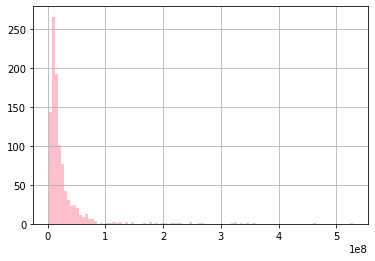

In [35]:
inst['Number of Followers'].hist(bins = 100, color = 'pink')

<AxesSubplot:>

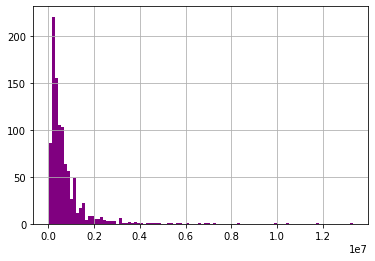

In [36]:
inst['Avg User Engagement'].hist(bins = 100, color = 'purple')

<font color = blue> Также построим график для одной из категориальных переменных по значениям ER.

<AxesSubplot:>

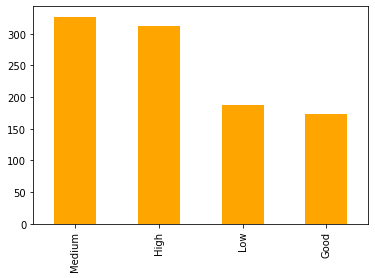

In [37]:
inst['Engagement Rate Category'].value_counts().plot(kind = 'bar', color = 'orange')

### 3. Описательные статистики
#### Меры центральной тенденции

<font color = blue> Рассчитаем меры центральной тенденции и разброса по количественным данным из нашего датасета с помощью метода describe. Мы можем применить метод describe на весь датасет, чтобы получить агрегированную таблицу по всем столбцам с расчетом мер центральной тенденции.

In [38]:
inst.describe()

,Rank №,Number of Followers,Authentic Engagement,Avg User Engagement,Engagement Rate
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.00000
mean,500.500000,2.604460e+07,5.661992e+05,7.728611e+05,6.13492
std,288.819436,4.409884e+07,9.956089e+05,1.117135e+06,8.27138
min,1.000000,1.600000e+06,0.000000e+00,2.110000e+04,0.02000
25%,250.750000,8.600000e+06,1.690000e+05,2.524250e+05,1.25000
50%,500.500000,1.410000e+07,3.160500e+05,4.633000e+05,3.29500
75%,750.250000,2.542500e+07,6.042750e+05,8.501250e+05,7.50250
max,1000.000000,5.284000e+08,1.330000e+07,1.330000e+07,118.75000


<font color = blue> Столбец Rank, который воспринимается библиотекой pandas как количественный, в нашем случае имеет все-таки категориальный смысл, так как в нем отражается порядковый номер аккаунте в рейтинге топ-1000, поэтому на него обращать внимание не стоит – исключим его из выборки.

In [39]:
inst[['Number of Followers', 'Authentic Engagement', 'Avg User Engagement', 'Engagement Rate']].describe()

,Number of Followers,Authentic Engagement,Avg User Engagement,Engagement Rate
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.00000
mean,2.604460e+07,5.661992e+05,7.728611e+05,6.13492
std,4.409884e+07,9.956089e+05,1.117135e+06,8.27138
min,1.600000e+06,0.000000e+00,2.110000e+04,0.02000
25%,8.600000e+06,1.690000e+05,2.524250e+05,1.25000
50%,1.410000e+07,3.160500e+05,4.633000e+05,3.29500
75%,2.542500e+07,6.042750e+05,8.501250e+05,7.50250
max,5.284000e+08,1.330000e+07,1.330000e+07,118.75000


<font color = blue> Воспользуемся функциями по расчету мер центральной тенденции на сгруппированных данных.   
    Например, посмотрим, сколько в среднем подписчиков набирают аккаунты, сгруппированные по тематике.

In [40]:
inst.groupby('Blog Topic')['Number of Followers'].mean()

Blog Topic
Adult content                                1.158333e+07
Animals                                      1.010000e+07
Art/Artists                                  1.358571e+07
Art/ArtistsBeauty                            1.840000e+07
Art/ArtistsCinema & Actors/actresses         1.620000e+07
                                                 ...     
Sports with a ballLifestyle                  2.270000e+07
Sports with a ballLifestyleKids & Toys       1.560000e+07
Sports with a ballLiterature & Journalism    1.740000e+07
Sports with a ballShows                      3.130000e+07
TravelCinema & Actors/actresses              4.000000e+06
Name: Number of Followers, Length: 153, dtype: float64

<font color = blue> Также с помощью функции mean можем посмотреть, сколько в среднем в каждой стране "оформляю" подписок на различные Инстаграм-аккаунты из данного датасета.

In [41]:
inst.groupby('Audience Country')['Number of Followers'].mean()

Audience Country
Albania                 1.030000e+07
Algeria                 9.100000e+06
Argentina               3.225217e+07
Brazil                  2.526345e+07
Chile                   1.410000e+07
China                   2.890000e+07
Colombia                2.127500e+07
Egypt                   2.510000e+07
France                  2.706667e+07
Germany                 2.702500e+07
India                   3.575031e+07
Indonesia               1.573971e+07
Iran                    1.219524e+07
Iraq                    1.137500e+07
Italy                   1.855000e+07
Japan                   6.075000e+06
Kazakhstan              6.900000e+06
Mexico                  1.944250e+07
Morocco                 8.650000e+06
Nigeria                 1.975000e+07
Pakistan                6.600000e+06
Philippines             1.135714e+07
Poland                  2.680000e+07
Russia                  1.490000e+07
Senegal                 1.600000e+06
South Korea             1.371538e+07
Spain                

<font color = blue> С помощью функции agg и через анонимную функцию lambda мы также можем найти значение моды для категориальных данных – посмотрим на то, какой коэффициент вовлечения наиболее часто встречается в каждой стране.

In [42]:
inst.groupby('Audience Country')['Engagement Rate Category'].agg(lambda x: x.value_counts().index[0])

Audience Country
Albania                 Medium
Algeria                   Good
Argentina                 High
Brazil                  Medium
Chile                   Medium
China                     Good
Colombia                  Good
Egypt                      Low
France                    High
Germany                    Low
India                   Medium
Indonesia                 High
Iran                    Medium
Iraq                      Good
Italy                      Low
Japan                     High
Kazakhstan                Good
Mexico                    High
Morocco                   Good
Nigeria                    Low
Pakistan                  Good
Philippines               High
Poland                  Medium
Russia                  Medium
Senegal                   High
South Korea               High
Spain                   Medium
Syria                     Good
Thailand                  High
Turkey                  Medium
United Arab Emirates      Good
United Kingdom        

<font color = blue> Также через agg посмотрим на среднее и медианное значения уже по числовым данным о коэффициенте вовлеченности в разрезе стран, из которых люди подписывались на аккаунты. Получим мини-датасет со средними и медианными значениями ER в разбивке по каждой стране.

In [43]:
inst.groupby('Audience Country')['Engagement Rate'].agg(['mean', 'median'])

,mean,median
Audience Country,,
Albania,2.070000,2.070
Algeria,4.340000,4.340
Argentina,5.396522,5.040
Brazil,3.596483,2.230
Chile,1.320000,1.320
China,5.190000,5.190
Colombia,3.401250,3.435
Egypt,1.316000,0.970
France,5.826667,3.220


<font color = blue> Мы также можем получить агрегированные данные по интересующим нас столбцам с помощью пивотальной таблицы. Сгруппирум данные по стране аудитории, посмотрим на средние и медианные значения по трем столбцам – "Number of Followers","Engagement Rate" и "Avg User Engagement".

In [44]:
inst.pivot_table(index = 'Audience Country',
                values = ['Number of Followers','Engagement Rate','Avg User Engagement'],
                aggfunc = ['mean', 'median'])

mean                                      \
                     Avg User Engagement Engagement Rate Number of Followers   
Audience Country                                                               
Albania                     2.129000e+05        2.070000        1.030000e+07   
Algeria                     3.952000e+05        4.340000        9.100000e+06   
Argentina                   8.827522e+05        5.396522        3.225217e+07   
Brazil                      5.283662e+05        3.596483        2.526345e+07   
Chile                       1.863000e+05        1.320000        1.410000e+07   
China                       1.500000e+06        5.190000        2.890000e+07   
Colombia                    4.489875e+05        3.401250        2.127500e+07   
Egypt                       3.835800e+05        1.316000        2.510000e+07   
France                      5.974500e+05        5.826667        2.706667e+07   
Germany                     1.800000e+05        1.622500        2.702500e+07   
India                       7.156950e+05        4.284843        3.575031e+07   
Indonesia                   1.049643e+06        9.697500        1.573971e+07   
Iran                        5.342810e+05        6.564762        1.219524e+07   
Iraq                        3.763000e+05        4.272500        1.137500e+07   
Italy                       4.270438e+05        4.841875        1.855000e+07   
Japan                       4.989250e+05        9.682500        6.075000e+06   
Kazakhstan                  3.706000e+05        5.370000        6.900000e+06   
Mexico                      8.050950e+05        6.413500        1.944250e+07   
Morocco                     4.110500e+05        4.790000        8.650000e+06   
Nigeria                     2.737000e+05        1.565000        1.975000e+07   
Pakistan                    3.158000e+05        4.780000        6.600000e+06   
Philippines                 4.843286e+05        5.152857        1.135714e+07   
Poland                      3.971000e+05        1.480000        2.680000e+07   
Russia                      5.639885e+05        4.675385        1.490000e+07   
Senegal                     1.900000e+06      118.750000        1.600000e+06   
South Korea                 1.654085e+06       14.600769        1.371538e+07   
Spain                       4.530882e+05        3.049412        2.421471e+07   
Syria                       4.420000e+05        4.910000        9.000000e+06   
Thailand                    4.958833e+05        8.006667        1.005000e+07   
Turkey                      6.427600e+05        6.390000        1.566500e+07   
United Arab Emirates        3.324500e+05        3.850000        1.065000e+07   
United Kingdom              4.241118e+05        5.637059        1.877059e+07   
United States               8.218913e+05        6.082924        3.338556e+07   

                                  median                                      
                     Avg User Engagement Engagement Rate Number of Followers  
Audience Country                                                              
Albania                           212900           2.070          10300000.0  
Algeria                           395200           4.340           9100000.0  
Argentina                         649500           5.040          14700000.0  
Brazil                            300500           2.230          17400000.0  
Chile                             186300           1.320          14100000.0  
China                            1500000           5.190          28900000.0  
Colombia                          375800           3.435          14800000.0  
Egypt                             152600           0.970          19400000.0  
France                            623300           3.220          11450000.0  
Germany                           138250           0.410          33749999.5  
India                             453700           2.550          20400000.0  
Indonesia                         745450         

#### Меры разброса

<font color = blue> Сгруппируем данные по странам и суммарному количеству подписчиков с помощью функции groupby, а затем запишем этот мини-датафрейм в отдельную переменную.

In [45]:
followers_country = pd.DataFrame(inst.groupby('Audience Country')['Number of Followers'].sum())

<font color = blue> Посмотрим, как полученное распределение выглядит на графике.

<AxesSubplot:xlabel='Audience Country'>

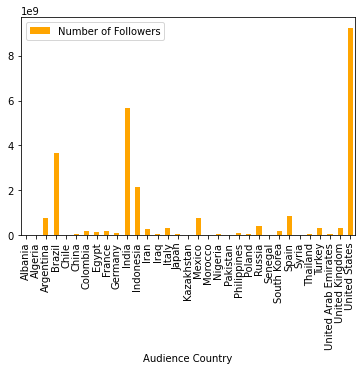

In [46]:
followers_country.plot(kind = 'bar', color = 'orange')

<font color = blue> Далее перейдем к расчетам мер разброса. Начнем с размаха по переменной "Number of Followers". Чтобы найти размах, необходимо вычесть из максимального значение минимальное.

In [47]:
followers_country['Number of Followers'].max() - followers_country['Number of Followers'].min()

9246199993

<font color = blue> Теперь посчитаем интерквартильный размах, то есть найдем разницу между 75 и 25 перцентилем.

In [48]:
np.percentile(followers_country['Number of Followers'], 75) - np.percentile(followers_country['Number of Followers'], 25)

297800000.0

<font color = blue> Перейдем к расчетам дисперсии и среднеквадратичного отклонения. При расчете этих мер разброса необходимо учитывать, считаются они для выборки (в таком случае делим на кол-во наблюдений -1) или для генеральной совокупности (тогда делим на кол-во наблюдений).   
    Для начала найдем меры для выборки.

In [49]:
followers_mean = followers_country['Number of Followers'].mean() #находим среднее
deviations = followers_country['Number of Followers'] - followers_mean #находим отклонение от среднего
sq_deviations = deviations ** 2 #возводим отклонение в квадрат, находим квадратное отклонение
variance_samp = sq_deviations.sum() / (len(followers_country) - 1) #находим дисперсию для выборки
std_samp = np.sqrt(variance_samp) #находим среднеквадратичное отклонение

print(variance_samp, std_samp)

3.6917647412659507e+18 1921396560.126501


<font color = blue> Затем найдем дисперсию и среднеквадратичное отклонение для генеральной совокупности.

In [50]:
variance_pop = sq_deviations.sum() / len(followers_country) #находим дисперсию для ген. совокупности
std_pop = np.sqrt(variance_pop) #находим среднеквадратичное отклонение

print(variance_pop, std_pop)

3.5798930824397097e+18 1892060538.7882571


<font color = blue> Мы также можем использовать специальный функционал библиотеки, чтобы найти дисперсию и среднеквадратичное отклонение. Проверим, как работают данные функции. Будем считать, что мы все-таки работаем с генеральной совокупностью, то есть проводим анализ конкретно для тех 1000 аккаунтов, которые имеем в выборке. Для этого укажем степени свободы, равные 0.

In [51]:
print(followers_country['Number of Followers'].var(ddof = 0)) #находим дисперсию для выборки
print(followers_country['Number of Followers'].std(ddof = 0)) #находим среднеквадратичное отклонение для выборки

3.5798930824397097e+18
1892060538.7882571


<font color = blue> Можем также найти значения среднеквадратичного отклонения и других мер разброса для агрегированных данных. Например, сгруппируем значения Engagement Rate по странам и посмотрим на показатели среднего и std через агрегирующую функцию agg.

In [52]:
inst.groupby('Audience Country')['Engagement Rate'].agg(['mean','std'])

,mean,std
Audience Country,,
Albania,2.070000,NaN
Algeria,4.340000,NaN
Argentina,5.396522,3.960027
Brazil,3.596483,4.242583
Chile,1.320000,NaN
China,5.190000,NaN
Colombia,3.401250,2.472335
Egypt,1.316000,0.726003
France,5.826667,6.903239


<font color = blue> Также можем рассчитать такие значения и для пивотальной таблицы. В этом случае сначала зададим собственную функцию, которая рассчитывает размах. И затем получим пивотальной таблицу для всех мер разброса, которые зададим через aggfunc.

In [53]:
def range_values(x):
    return x.max() - x.min()


inst.pivot_table(index = 'Audience Country',
                values = ['Number of Followers','Engagement Rate','Avg User Engagement'],
                aggfunc = ['var', 'std', range_values])

var                                      \
                     Avg User Engagement Engagement Rate Number of Followers   
Audience Country                                                               
Argentina                   8.966907e+11       15.681815        4.838925e+15   
Brazil                      3.188022e+11       17.999512        8.342766e+14   
Colombia                    7.323691e+10        6.112441        2.735907e+14   
Egypt                       1.734347e+11        0.527080        2.328350e+14   
France                      1.068517e+11       47.654707        8.659787e+14   
Germany                     1.155434e+10        6.213892        1.911025e+14   
India                       7.791737e+11       32.986390        4.176863e+15   
Indonesia                   1.438917e+12       62.359431        2.597762e+14   
Iran                        1.441689e+11       46.316466        6.650648e+13   
Iraq                        1.028065e+11       22.919425        1.106917e+13   
Italy                       7.274367e+10       32.827790        2.904787e+14   
Japan                       3.945888e+10       28.247225        6.582500e+12   
Mexico                      5.271936e+11       36.340736        2.914876e+14   
Morocco                     2.556125e+09        0.156800        3.125000e+12   
Nigeria                     9.031680e+09        1.051250        4.704500e+13   
Philippines                 8.335621e+10        9.033390        2.935619e+13   
Russia                      5.153515e+11       21.161578        5.509760e+13   
South Korea                 3.280317e+12       97.106908        1.140447e+14   
Spain                       1.008330e+11        7.854969        5.025546e+14   
Thailand                    5.490618e+10       54.699107        2.800300e+13   
Turkey                      6.013824e+11      117.426884        1.179287e+14   
United Arab Emirates        1.159764e+10        8.569800        2.812500e+13   
United Kingdom              6.821734e+10       44.270810        2.974197e+14   
United States               1.666507e+12       67.759734        3.244976e+15   
Albania                              NaN             NaN                 NaN   
Algeria                              NaN             NaN                 NaN   
Chile                                NaN             NaN                 NaN   
China                                NaN             NaN                 NaN   
Kazakhstan                           NaN             NaN                 NaN   
Pakistan                             NaN             NaN                 NaN   
Poland                               NaN             NaN                 NaN   
Senegal                              NaN             NaN                 NaN   
Syria                                NaN             NaN                 NaN   

                                     std                                      \
                     Avg User Engagement Engagement Rate Number of Followers   
Audience Country                                                               
Argentina                   9.469375e+05        3.960027        6.956238e+07   
Brazil                      5.646257e+05        4.242583        2.888385e+07   
Colombia                    2.706232e+05        2.472335        1.654058e+07   
Egypt                       4.164549e+05        0.726003        1.525893e+07   
France                      3.268818e+05        6.903239        2.942752e+07   
Germany                     1.074911e+05        2.492768        1.382398e+07   
India                       8.827082e+05        5.743378        6.462866e+07   
Indonesia                   1.199549e+06        7.896799        1.611757e+07   
Iran                        3.796959e+05        6.805620        8.155150e+06   
Iraq                        3.206345e+05        4.787424        3.327036e+06   
Italy                       2.697104e+05        5.729554        1.704343e+07   
Japan                       1.986426

### 4. Z-оценка и выбросы
#### Рассчитываем Z-оценку и стандартизированные значения

In [54]:
import scipy.stats

<font color = blue> Попробуем применить метод z-оценки на наших данных. Возьем данные по среднему коэффициенту вовлеченности, сгруппированные по странам, а затем рассчитаем z-оценку по ER для каждый страны и добавим дополнительный столбец в датафрейм.

In [55]:
country_rate = pd.DataFrame(inst.groupby('Audience Country')['Engagement Rate'].mean())

In [56]:
country_rate['z-score'] = scipy.stats.zscore(country_rate['Engagement Rate'])

In [57]:
country_rate

,Engagement Rate,z-score
Audience Country,,
Albania,2.070000,-0.324285
Algeria,4.340000,-0.208947
Argentina,5.396522,-0.155265
Brazil,3.596483,-0.246725
Chile,1.320000,-0.362392
China,5.190000,-0.165758
Colombia,3.401250,-0.256644
Egypt,1.316000,-0.362595
France,5.826667,-0.133409


<font color = blue> Таким образом, в этом датафрейме мы можем увидеть, как отличается средний коэффициент Engagement Rate по странам от среднего по всем данным. Посмотрим, как это распределение выглядит на графике.

<AxesSubplot:>

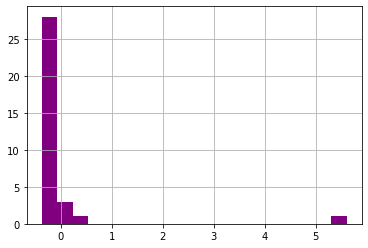

In [58]:
country_rate['z-score'].hist(bins = 20, color = 'purple')

<font color = blue> На графике видно, что распределение находится в рамках примерно от -0,5 до 0,5. Однако есть очевидный выброс, где значение отклоняется более чем на 5 среднеквадратичных отклонений. Посмотрим, что это за страна.

In [59]:
country_rate[country_rate['z-score'] > 5]

,Engagement Rate,z-score
Audience Country,,
Senegal,118.75,5.604199


<font color = blue> Если верить результатам проведенного анализа, средний уровень вовлеченности пользователей из Сенегала на Инстаграм-аккаунтах из анализируемого датасета отклоняется в большую на сторону более чем на 5, то есть такие пользователи характеризуются крайне высокой вовлеченностью. Но так как в терминах z-распределения отклонение больше, чем на 3, считается крайне маловероятным и учитывая базовую соц-дем статистику по Сенегалу, определенно можно сказать, что эти данные нуждаются в дополнительной проверке. Далее, на этапе работы с выбросами датасета, мы сможем исключить влияние этих данных.

#### Анализ выбросов через интерквартильный размах

<font color = blue> Проанализируем выбросы значений по переменной Engagement Rate. Сначала посмотрим на основные описательные статистики, а затем определим выбросы.

In [60]:
inst['Engagement Rate'].describe()

count    1000.00000
mean        6.13492
std         8.27138
min         0.02000
25%         1.25000
50%         3.29500
75%         7.50250
max       118.75000
Name: Engagement Rate, dtype: float64

<font color = blue> Определим выбросы с помощью интерквартильного квартильного размаха – будем считать выбросами все, что находится ниже 1ого квартиля и выше 3ого квартиля на 1,5 интерквартильных размаха. Для этого сначала необходимо найти этот интерквартильный размах, а затем найти границу сверху и снизу, по которым мы будем определять выбросы.

In [61]:
q3 = np.percentile(inst['Engagement Rate'], 75) #находим 3ий квартиль
q1 = np.percentile(inst['Engagement Rate'], 25) #находим 1ый квартиль

iqr = q3 - q1 #находим интерквартильный размах
print(iqr)

6.2525


In [62]:
iqr_threshold_bottom = q1 - 1.5 * iqr #определяем нижнюю границу
iqr_threshold_top = q3 + 1.5 * iqr #определяем верхнюю границу

print(iqr_threshold_bottom, iqr_threshold_top)

-8.12875 16.88125


<font color = blue> Обратим внимание, что значение нижней границы оказалось ниже минимального значения – это значит, что выборка смещена в правую сторону и выбросов слева не будет, поэтому мы не будем учитывать нижнюю границу при дальнейших расчетах.  
    Посмотрим на выбросы по верхней границе.

In [63]:
inst[inst['Engagement Rate'] > iqr_threshold_top].shape

(91, 9)

<font color = blue> Получили 91 выброс – теперь посмотрим, как эти выбросы сгруппированы по странам.

In [64]:
inst[inst['Engagement Rate'] > iqr_threshold_top]['Audience Country'].value_counts()

Indonesia               28
United States           25
India                    7
South Korea              6
Brazil                   3
Mexico                   3
Iran                     2
Turkey                   2
Thailand                 2
Russia                   1
Senegal                  1
Italy                    1
United Kingdom           1
France                   1
United Arab Emirates     0
Pakistan                 0
Spain                    0
Syria                    0
Poland                   0
Philippines              0
Albania                  0
Nigeria                  0
Morocco                  0
Algeria                  0
Japan                    0
Iraq                     0
Germany                  0
Egypt                    0
Colombia                 0
China                    0
Chile                    0
Argentina                0
Kazakhstan               0
Name: Audience Country, dtype: int64

<font color = blue> Мы видим, что выбросы по наибольшему коэффициенту вовлеченности характерны для самых населенных стран из выборки, а также для высокотехнологичных стран – то есть ER чаще выходит за границу там, где 1) больше людей в принципе 2) больше людей пользуются технологиями и соцсетями.

#### Анализ выбросов через среднеквадратичное отклонение

<font color = blue> Будем считать выбросами те наблюдения, которые находятся через 2,5 среднеквадратичного отклонения от среднего.  
    Сначала найдем среднее, а затем определить границы, по которым будем далее находить выбросы.

In [65]:
mean = inst['Engagement Rate'].mean() #находим среднее
std = inst['Engagement Rate'].std() #находим среднеквадратичное отклонение

std_threshold_bottom = mean - 2.5 * std #определяем нижнюю границу
std_threshold_top = mean + 2.5 * std #определяем верхнюю границу

print (std_threshold_bottom, std_threshold_top)

-14.543529397367301 26.813369397367296


<font color = blue> Снова видим, что значение нижней границы оказалось ниже минимального значения – значит выбросов слева не будет и мы можем не учитывать нижнюю границу при дальнейших расчетах.  
    Посмотрим на выбросы по верхней границе.

In [66]:
inst[inst['Engagement Rate'] > std_threshold_top].shape

(30, 9)

<font color = blue> По такой методике расчета получили 30 выбросов, то есть почти в 3 раза меньше по сравнению с методом расчета по интерквартильному размаху. Посмотрим отфильтровать датасет и посмотреть, как будут выглядеть меры центральной тенденции в оригинальной выборке (с выбросами) и в той выборке, из которой выбросы исключены по двум методикам расчета.

In [67]:
iqr_no_outliers = inst[inst['Engagement Rate'] <= iqr_threshold_top] #отбираем значения без выбросов по iqr
std_no_outliers = inst[inst['Engagement Rate'] <= std_threshold_top] #отбираем значения без выбросов по std

In [68]:
print(inst['Engagement Rate'].mean()) #оригинальное значение
print(iqr_no_outliers['Engagement Rate'].mean())
print(std_no_outliers['Engagement Rate'].mean())

6.134919999999998
4.130803080308032
5.144917525773198


<font color = blue> Видим, что все 3 значения отличаются – оригинальное среднее, включающее выбросы, разумеется, получилось самым высоким. Выбросы по iqr и std также отличаются, так как использованы соответствующие методы расчета и пороги для отсечения выбросов различаются (если порог повыше, то "отрезаем" меньше значений).

<font color = blue> Посмотрим, как меняется медиана.

In [69]:
print(inst['Engagement Rate'].median()) #оригинальное значение
print(iqr_no_outliers['Engagement Rate'].median())
print(std_no_outliers['Engagement Rate'].median())

3.295
2.8
3.125


<font color = blue> Видим, что медиана по значениям ER оказалась более устойчивой, разница для трех полученных значений не такая заметная, как в случае со средним.

### 5. Корреляция
#### Постановка гипотез о взаимосвязи и расчет значения корреляции переменных

<font color = blue> Проверим гипотезу о том, что существует взаимосвязь между количеством подписчиков и коэффициентом их вовлеченности. Будем анализиолвать данные по колонкам "Engagement Rate" и "Number of Followers", сгруппированные по странам.

In [70]:
import warnings 
warnings.filterwarnings('ignore')

<font color = blue> Создадим два объекта pandas series (средний коэффициент Engagement Rate и суммарное кол-во подписчиков по странам) и соберем их в один датафрейм с помощью метода конкатенации.

In [71]:
er_mean = inst.groupby('Audience Country')['Engagement Rate'].mean()
followers_sum = inst.groupby('Audience Country')['Number of Followers'].sum()

In [72]:
inst_сountry = pd.concat([er_mean,followers_sum], axis = 1)

<font color = blue> Перейдем к нахождению корреляции между количеством подписчиков и коэффициентом вовлеченности этих подписчиков. Сначала попробуем рассчитать корреляцию вручную на тестовом мини-датафрейме из первых пяти строк.

In [73]:
first_five = inst_сountry.iloc[:5]
first_five

,Engagement Rate,Number of Followers
Audience Country,,
Albania,2.070000,10300000
Algeria,4.340000,9100000
Argentina,5.396522,741800000
Brazil,3.596483,3663199999
Chile,1.320000,14100000


In [74]:
first_five['x - Mx'] = first_five['Number of Followers'] - first_five['Number of Followers'].mean() #отклонение от среднего для X
first_five['y - My'] = first_five['Engagement Rate'] - first_five['Engagement Rate'].mean() #отклонение от среднего для Y

first_five

,Engagement Rate,Number of Followers,x - Mx,y - My
Audience Country,,,,
Albania,2.070000,10300000,-8.774000e+08,-1.274601
Algeria,4.340000,9100000,-8.786000e+08,0.995399
Argentina,5.396522,741800000,-1.459000e+08,2.051921
Brazil,3.596483,3663199999,2.775500e+09,0.251882
Chile,1.320000,14100000,-8.736000e+08,-2.024601


In [75]:
SSx = (first_five['x - Mx'] ** 2).sum() #сумма квадратов для X
SSy = (first_five['y - My'] ** 2).sum() #сумма квадратов для Y
SP = (first_five['x - Mx'] * first_five['y - My']).sum() #сумма произведений отклонений

print (SSx, SSy, SP)

1.0029632734448998e+19 10.988259227602391 2412191374.560713


In [76]:
r = SP / np.sqrt(SSx * SSy) #находим корреляцию

print (r) 

0.22977606981755822


<font color = blue> Теперь проверим правильность расчетов с помощью функции corr из библиотеки pandas.

In [77]:
first_five['Number of Followers'].corr(first_five['Engagement Rate'])

0.22977606981755816

<font color = blue> Получаем такое же значение, значит коэффициент корреляции найден правильно. Корреляция равна 0.2, то есть практически отсутствует (слабая корреляция по Чеддоку –  от 0.1 до 0.3). Теперь посчитаем корреляцию для всей совокупности.

In [78]:
inst_сountry['Number of Followers'].corr(inst_сountry['Engagement Rate'])

-0.0623988630124481

<font color = blue> Видим, что корреляция изменилась и стала отрицательной, но ее значение по-прежнему нельзя назвать статистически значимым. Визуализируем ее на графике. 

<AxesSubplot:xlabel='Number of Followers', ylabel='Engagement Rate'>

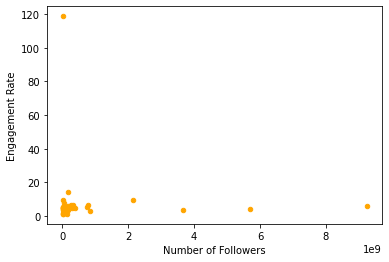

In [79]:
inst_сountry.plot('Number of Followers', 'Engagement Rate', kind = 'scatter', color = 'orange')

<font color = blue> Таким образом, на основе проведенного анализа мы можем сделать вывод, что для имеющихся у нас данных отсутствует корреляция между количеством подписчиков и их коэффициентом вовлеченности.